In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [3]:
df = pd.read_csv("current_price_six_states.csv").T
df.to_csv("current_price_six_states.csv")
df.head()


In [3]:
data = pd.read_csv("price_per_zone.csv")
data.T.to_csv("zone_prices.csv")

In [7]:
x = pd.read_csv("attacks_per_state - Sheet1.csv")
#x.head()
x.groupby("state")["total_deaths"].sum().to_csv("deaths.csv")
x["state"].value_counts().to_csv("attacks.csv")

# Data Cleaning

- Manually append prices from January-June 2022 to existing dataset(xlxs)
- Export to csv and load into a dataframe
- Transpose data (df.T) to move food items as columns and month as rows @prices.csv
- Export to Excel to clean up excess rows, edit format of date and convert all prices to floats


## Load data

In [2]:
# Load Cleaned data
df = pd.read_csv("prices - prices.csv")
df.head()

,Date,Agric eggs medium size,Agric eggs(medium size price of one),"Beans brown,sold loose",Beans:white black eye. sold loose,Beef Bone in,"Beef,boneless",Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),...,"Rice local (ofada), sold loose",Rice Medium Grained,"Rice (imported high quality), sold loose",Sweet potato,Tilapia fish (epiya) fresh,Titus (frozen),Tomato,Vegetable oil:1 bottle,Wheat flour: prepacked (golden penny 2kg),Yam tuber
0,31/01/2017,512.99,47.42,353.60,305.53,1001.24,1249.48,302.87,270.25,377.41,...,286.19,312.08,402.01,129.43,792.18,884.82,247.55,495.29,626.53,210.58
1,28/02/2017,520.16,42.90,337.11,309.85,995.65,1270.67,299.75,264.86,392.04,...,306.29,352.69,410.58,127.23,795.27,942.23,236.62,507.36,621.39,215.55
2,31/03/2017,507.69,43.93,353.28,318.45,1010.29,1281.71,297.51,262.33,421.54,...,308.87,377.99,418.71,132.94,798.07,964.63,268.64,513.42,623.10,255.86
3,30/04/2017,518.66,46.22,357.19,324.04,1035.45,1323.10,296.63,277.69,425.53,...,299.30,332.81,388.46,132.43,800.77,935.00,285.72,525.72,627.33,250.30
4,31/05/2017,522.71,45.73,365.86,332.28,1123.65,1378.91,307.70,282.26,460.10,...,323.82,350.36,410.55,130.28,805.21,969.64,339.72,524.77,646.18,279.15


In [7]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [5]:
# Set date as index
df.set_index("Date")

,Agric eggs medium size,Agric eggs(medium size price of one),"Beans brown,sold loose",Beans:white black eye. sold loose,Beef Bone in,"Beef,boneless",Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),Catfish (dried),...,"Rice local (ofada), sold loose",Rice Medium Grained,"Rice (imported high quality), sold loose",Sweet potato,Tilapia fish (epiya) fresh,Titus (frozen),Tomato,Vegetable oil:1 bottle,Wheat flour: prepacked (golden penny 2kg),Yam tuber
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-31,512.99,47.42,353.60,305.53,1001.24,1249.48,302.87,270.25,377.41,2204.12,...,286.19,312.08,402.01,129.43,792.18,884.82,247.55,495.29,626.53,210.58
2017-02-28,520.16,42.90,337.11,309.85,995.65,1270.67,299.75,264.86,392.04,2150.18,...,306.29,352.69,410.58,127.23,795.27,942.23,236.62,507.36,621.39,215.55
2017-03-31,507.69,43.93,353.28,318.45,1010.29,1281.71,297.51,262.33,421.54,2189.55,...,308.87,377.99,418.71,132.94,798.07,964.63,268.64,513.42,623.10,255.86
2017-04-30,518.66,46.22,357.19,324.04,1035.45,1323.10,296.63,277.69,425.53,2189.10,...,299.30,332.81,388.46,132.43,800.77,935.00,285.72,525.72,627.33,250.30
2017-05-31,522.71,45.73,365.86,332.28,1123.65,1378.91,307.70,282.26,460.10,2213.66,...,323.82,350.36,410.55,130.28,805.21,969.64,339.72,524.77,646.18,279.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,654.90,59.82,509.65,497.54,1440.70,1919.52,438.03,400.83,496.57,2050.31,...,436.58,487.43,594.80,227.23,1144.68,1498.81,393.08,950.46,1021.66,339.76
2022-03-31,668.96,61.58,530.10,505.94,1496.47,1955.90,447.80,411.73,505.01,2090.01,...,441.80,488.58,607.68,228.05,1161.34,1526.95,409.96,970.29,1041.82,353.56
2022-04-30,678.91,64.00,530.62,519.05,1508.08,2026.85,450.51,412.25,513.50,2117.29,...,440.26,494.88,612.25,227.74,1176.90,1554.35,426.54,981.16,1047.74,361.20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date                                       66 non-null     datetime64[ns]
 1   Agric eggs medium size                     66 non-null     float64       
 2   Agric eggs(medium size price of one)       66 non-null     float64       
 3   Beans brown,sold loose                     66 non-null     float64       
 4   Beans:white black eye. sold loose          66 non-null     float64       
 5   Beef Bone in                               66 non-null     float64       
 6   Beef,boneless                              66 non-null     float64       
 7   Bread sliced 500g                          66 non-null     float64       
 8   Bread unsliced 500g                        66 non-null     float64       
 9   Broken Rice (Ofada)    

We can observe that some of the values are 'objects' which shouldn't be so

The columns are further cleaned

In [23]:
df.reset_index()
#eggs = df[["Date","Agric eggs(medium size price of one)"]]

plt.bar(x=df.Date, y=df.Agric eggs(medium size price of one));

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3633912963.py, line 3)

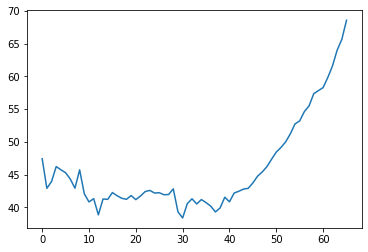

In [8]:
plt.plot(df["Agric eggs(medium size price of one)"]);